In [1]:
from scipy import io
import GPy
import numpy as np
import matplotlib.pyplot as plt
import pylab as pb
from scipy.stats import chisqprob
np.random.seed(1000)

In [2]:
def build_XI(input_list):
    num_outputs = len(input_list)
#     Y = np.vstack(output_list)
    I = np.hstack( [np.repeat(j,_x.shape[0]) for _x,j in zip(input_list,range(num_outputs))] )
    X = np.vstack(input_list)
    X = np.hstack([X,I[:,None]])
    I = {'output_index':I[:,None]}
    return X,I

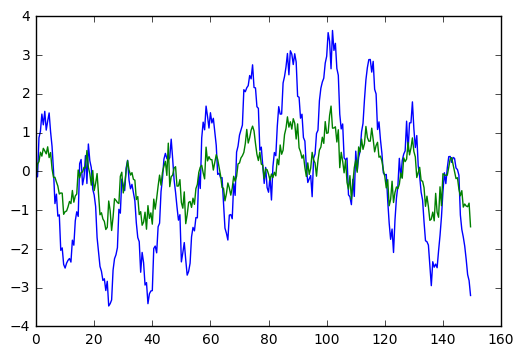

In [3]:
np.random.seed(1000)

X = np.arange(0,150,0.5)[:,None]
Y1 = 2*np.sin(X/5)
Y2 = 5*np.sin(X/5)

# kernel = GPy.kern.RBF(input_dim=1)
# model = GPy.models.GPRegression(X,Y,kernel)
# model.optimize()

# testX = np.linspace(0, 200, 101).reshape(-1, 1)
# posteriorTestY = model.posterior_samples(testX, full_cov=True, size=1)
# simY, simMse = model.predict(testX)

Y3 = np.cos(X/4)/1.5
Y1 = Y1*Y3 + np.random.randn(len(X), 1)*0.2
Y2 = Y2*Y3 + np.random.randn(len(X), 1)*0.3
plt.plot(X,Y2)
plt.plot(X,Y1)
plt.show()


In [4]:
from spot import bidSPOT
q = 1e-3 				# risk parameter
d = 40  				# depth parameter
s = bidSPOT(q,d) 

X = anomal_Y2
X = np.reshape(X,(1,len(X))).flatten()
n_init = 150
init_data = X[:n_init] 	# initial batch
data = X[n_init:] 
s.fit(init_data,data) 	# data import
s.initialize() 	  		# initialization step
results = s.run()    	# run
s.plot(results)

NameError: name 'anomal_Y2' is not defined

In [ ]:
anomal_Y2[226:234] = anomal_Y2[226:234]+0.1

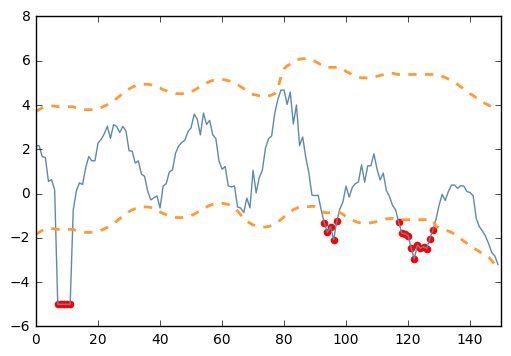

In [126]:
plt.show()

In [5]:
kernel = GPy.kern.RBF(1)
# kernel2 = GPy.kern.PeriodicExponential(1)
lcm = GPy.util.multioutput.LCM(input_dim=1,num_outputs=2,kernels_list=[kernel])

In [6]:
gp = GPy.models.GPCoregionalizedRegression([X,X],[Y1,Y2],kernel=lcm)
gp.optimize()

In [7]:
def plot_2outputs(m,xlim,x_1,x_2):
    fig = pb.figure(figsize=(14,12))
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    plt.grid(False)

    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.set_ylim([-9,5])
    ax1.set_title('Output 1',fontsize=20)
    ax1.tick_params(labelsize=20)
    ax1.set_ylabel(r'$y_{1}$',fontsize=24)
    m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],which_data_rows=slice(0,len(x_1)),ax=ax1)
    ax1.legend(loc=3,fontsize=22)

    #Output 2
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(xlim)
    ax2.set_ylim([-9,5])
    ax2.set_xlabel(r'$x$',fontsize=24)
    ax2.set_ylabel(r'$y_{2}$',fontsize=24)
    ax2.set_title('Output 2',fontsize=20)
    ax2.tick_params(labelsize=20)
    m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],which_data_rows=slice(len(x_1),len(x_1)+len(x_2)),ax=ax2)
    ax2.legend(loc=3,fontsize=22)
    
    fig.savefig('5.png',bbox_inches='tight')

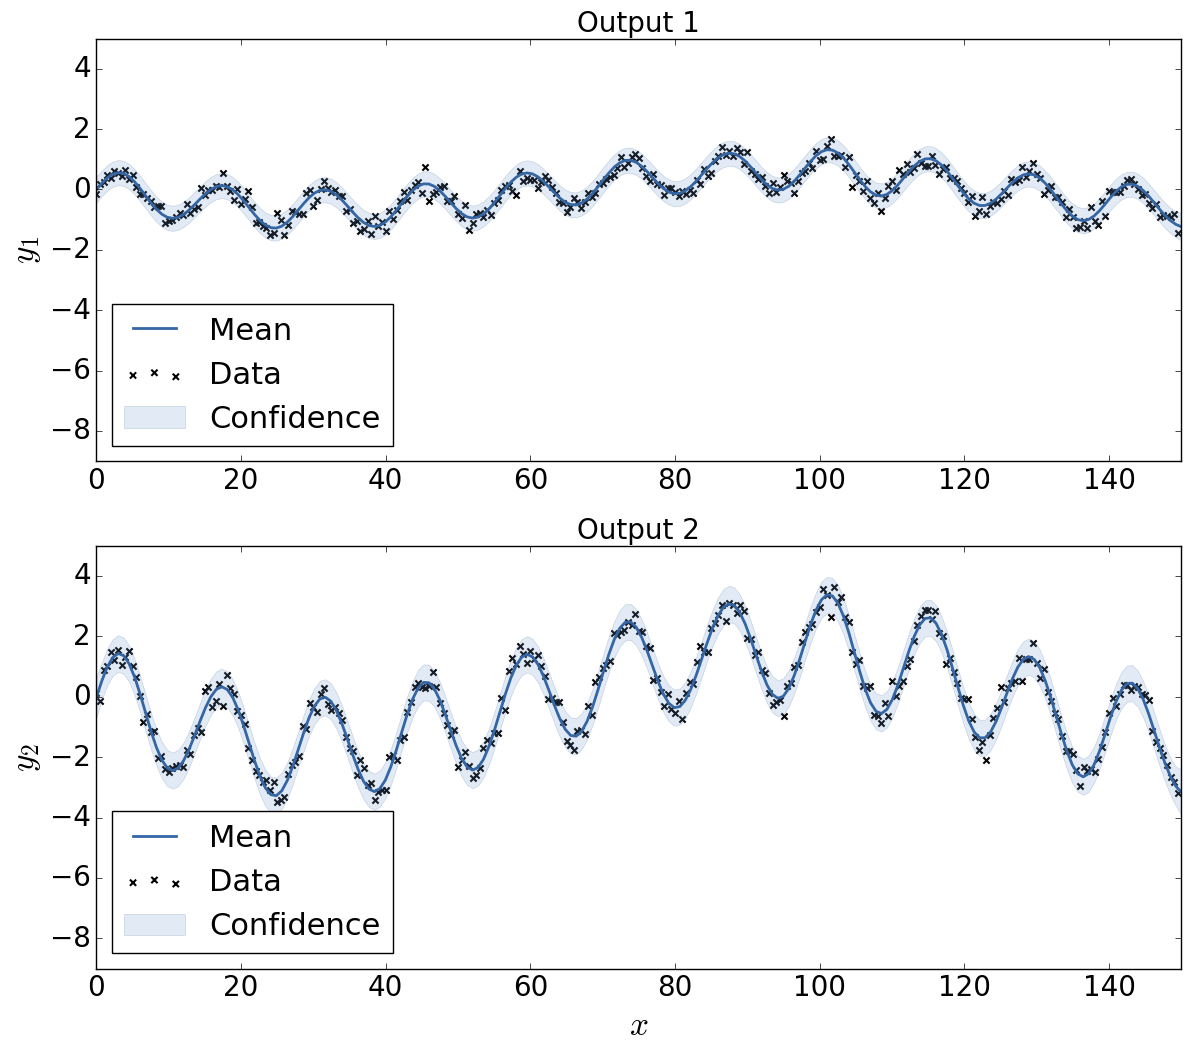

In [8]:
plot_2outputs(gp,[0,150],X,X)
plt.show()

In [9]:
anomal_Y2 = Y2.copy()

# make gradually incresing
l = list(range(220,240))
for i in range(len(l)):
#     if i<=10:
#         anomal_Y2[l[i]] = Y2[l[i]] + 0.2*i
#     else:
#         anomal_Y2[l[i]] = Y2[l[i]] + 0.1*(10-i)
    anomal_Y2[l[i]] = 2*Y2[l[i]]
# make outlier
anomal_Y2[157:162] = -5

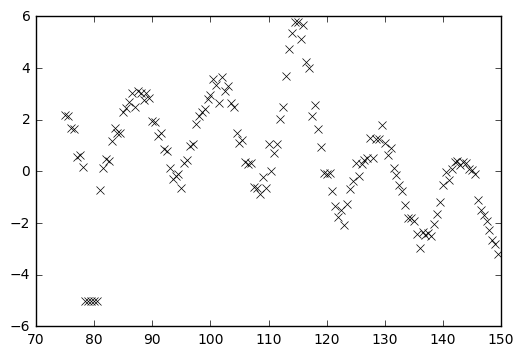

In [10]:
plt.plot(X[150:300],anomal_Y2[150:300],'kx')
plt.show()

In [11]:
def rbf(X,xt,m):
    Xt = xt*np.ones(len(X))[:,None]
    k = ((X-Xt)**2)/(2*(2*m.kern.rbf.lengthscale[0])**2)
#     k = ((X-Xt)**2)/(2*(2*m.kern.ICM0.rbf.lengthscale[0])**2)
    ke = np.exp(-k)
    n = np.sum(ke)
    return n

def z_score(n):
    alpha = (2*np.log(n))**(-0.5)
    beta = (2*np.log(n))**(0.5) - (np.log(np.log(n))+np.log(2*np.pi))/(2*(2*np.log(n))**0.5)
    zp = beta-alpha*np.log(-np.log(0.98))
    return zp

def Mahalanobis_distance(model,x_test,y2):
    X,I = build_XI([x_test,x_test])
    mean, variance = model.predict(X, full_cov=True, Y_metadata=I)
    l = len(x_test)
    MD2 = np.dot(np.dot(np.transpose(y2-mean[l:2*l]),np.linalg.inv(variance[l:2*l,l:2*l])),y2-mean[l:2*l])
    print(np.dot(np.transpose(y2-mean[l:2*l]),y2-mean[l:2*l]))
    return MD2

In [12]:
s = 0
l = 100
kern = gp.kern.copy()

it = list(range(s,s+l))
kt = it.copy()
anomal_points = []
test_points = []
test_points2 = []
chi_sq = []
con_bd = []
step = 1

for i in range(len(X)-l):    
    new = it[len(it)-1]+step
    test_points.append(new)
    print(new)
    
    mul = GPy.models.GPCoregionalizedRegression([X[kt],X[it]],[Y1[kt],anomal_Y2[it]],kernel = kern)
    mul['.*Gaussian_noise_0.variance'].constrain_fixed(gp.mixed_noise.Gaussian_noise_0.variance)
    mul['.*Gaussian_noise_1.variance'].constrain_fixed(gp.mixed_noise.Gaussian_noise_1.variance)
    
    # pointwise detection
    
    test_x = X[new]
    n = rbf(X[it],test_x,mul)
    zp = z_score(n)

    jt = it + list([new])
    Xt,It = build_XI([X[jt],X[jt]])
    mu,var = mul.predict(Xt,Y_metadata=It,kern=mul.kern,likelihood=mul.likelihood)
    mu2 = mu[int(len(mu)/2):len(mu)]
    var2 = var[int(len(mu)/2):len(mu)]
    con_ue = mu2 + np.sqrt(var2)*zp
    con_le = mu2 - np.sqrt(var2)*zp
    
    if i == 0:
        for j in range(len(con_ue)):
            con_bd.append([con_ue[j],con_le[j]])
            test_points2.append([jt[j],jt[j]])
    else:
        con_bd.append([con_ue[len(con_ue)-1],con_le[len(con_le)-1]])
        test_points2.append([new,new])
        
    
    if anomal_Y2[new] > mu2[l] + zp*np.sqrt(var2[l]) or anomal_Y2[new] < mu2[l] - zp*np.sqrt(var2[l]):
        anomal_points.append(new)
        it = it
        kt = kt + list([new])
        step += 1
        print(mu2[l] - zp*np.sqrt(var2[l]))
    else:
        it.pop(0)
        it = it + list([new])
        kt.pop(0)
        kt = kt + list([new])
        step = 1
    
    # trajectory detection    
    
    mul2 = GPy.models.GPCoregionalizedRegression([X[kt],X[it[0:len(it)-20]]],[Y1[kt],anomal_Y2[it[0:len(it)-20]]],kernel = kern)
    mul2['.*Gaussian_noise_0.variance'].constrain_fixed(gp.mixed_noise.Gaussian_noise_0.variance)
    mul2['.*Gaussian_noise_1.variance'].constrain_fixed(gp.mixed_noise.Gaussian_noise_1.variance)
    
    ct = it[len(it)-20:len(it)]
    md2 = Mahalanobis_distance(mul2,X[ct],anomal_Y2[ct])
    cs = chisqprob(md2,len(ct))[0][0]
    chi_sq.append(cs)
    
#     plot_3outputs(mul, xlim=(0,200),x_1=X[kt],x_2=X[it],con_ue=con_ue,con_le=con_le,n=new)
#     plt.show()

100
[[ 2.21937142]]
101
[[ 1.64665297]]
102
[[ 2.17656709]]
103
[[ 1.69635665]]
104
[[ 1.74553259]]
105
[[ 1.59224976]]
106
[[ 1.50353786]]
107
[[ 1.8838414]]
108
[[ 1.88455664]]
109
[[ 2.22355052]]
110
[[ 1.92186896]]
111
[[ 1.72604499]]
112
[[ 1.85279109]]
113
[[ 1.90737207]]
114
[[ 2.0874754]]
115
[[ 2.74743761]]
116
[[ 4.42560149]]
117
[[ 3.84784473]]
118
[[ 4.42561994]]
119
[[ 4.34825325]]
120
[[ 4.52186183]]
121
[[ 4.76214727]]
122
[[ 5.79919431]]
123
[[ 5.93681376]]
124
[[ 5.38781081]]
125
[[ 5.84290471]]
126
[[ 5.92684528]]
127
[[ 5.31768748]]
128
[[ 4.65409438]]
129
[[ 4.6338566]]
130
[[ 4.74883278]]
131
[[ 4.96980288]]
132
[[ 4.43583787]]
133
[[ 5.05987089]]
134
[[ 3.71996266]]
135
[[ 2.48054692]]
136
[[ 2.66675178]]
137
[[ 1.94982074]]
138
[[ 2.61538705]]
139
[[ 2.62467394]]
140
[[ 2.49738232]]
141
[[ 2.41300019]]
142
[[ 2.22818186]]
143
[[ 2.83297972]]
144
[[ 2.79795656]]
145
[[ 2.27561008]]
146
[[ 2.35405768]]
147
[[ 2.39117664]]
148
[[ 2.43380083]]
149
[[ 2.55562413]]
150

In [13]:
anomal_points

[157, 158, 159, 160, 161, 220]

In [14]:
f = (np.array(test_points2)[:,0]/2)[:,None][:,0]
c1 = (np.array(con_bd)[:,0])[:,0]
c2 = (np.array(con_bd)[:,1])[:,0]

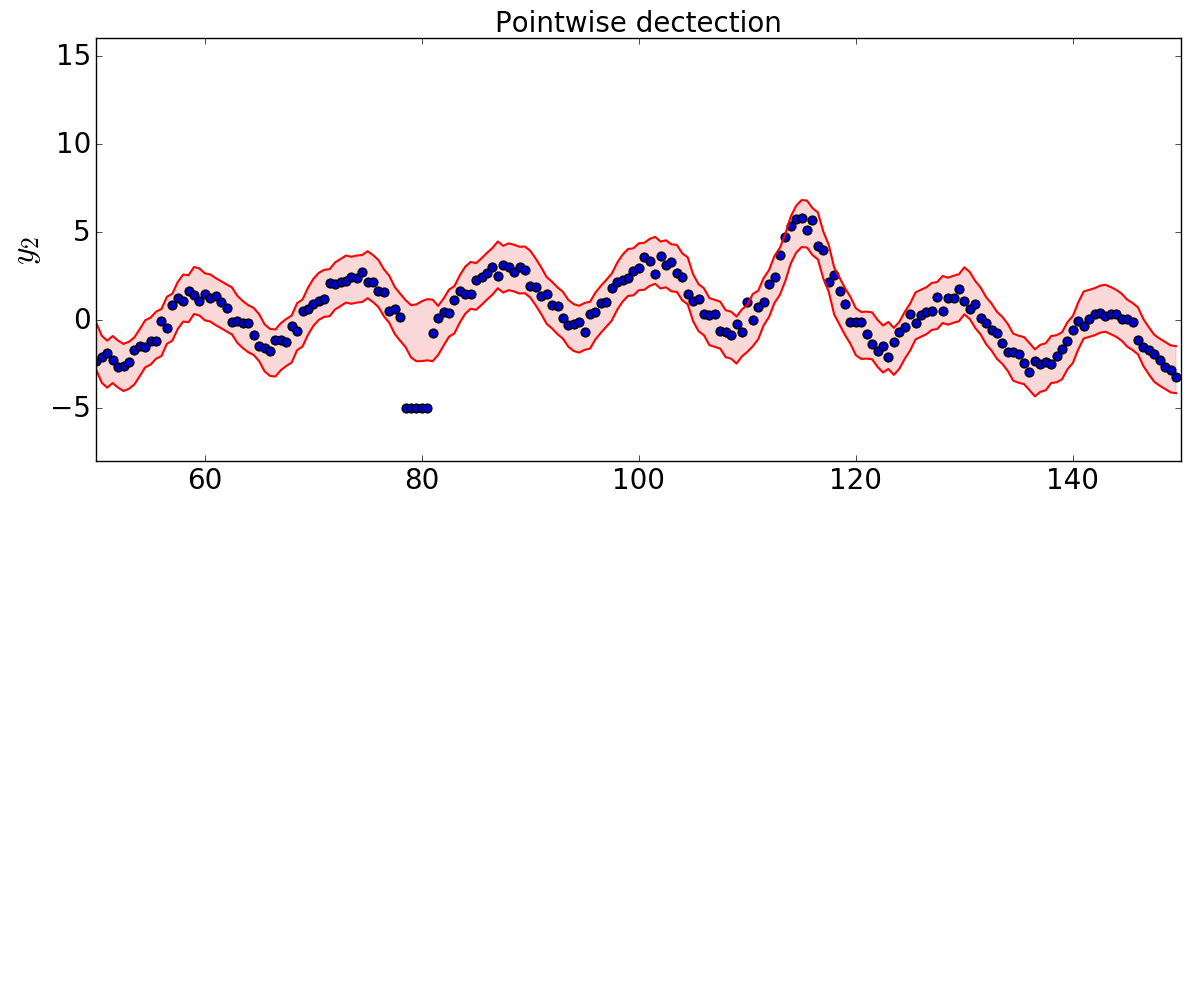

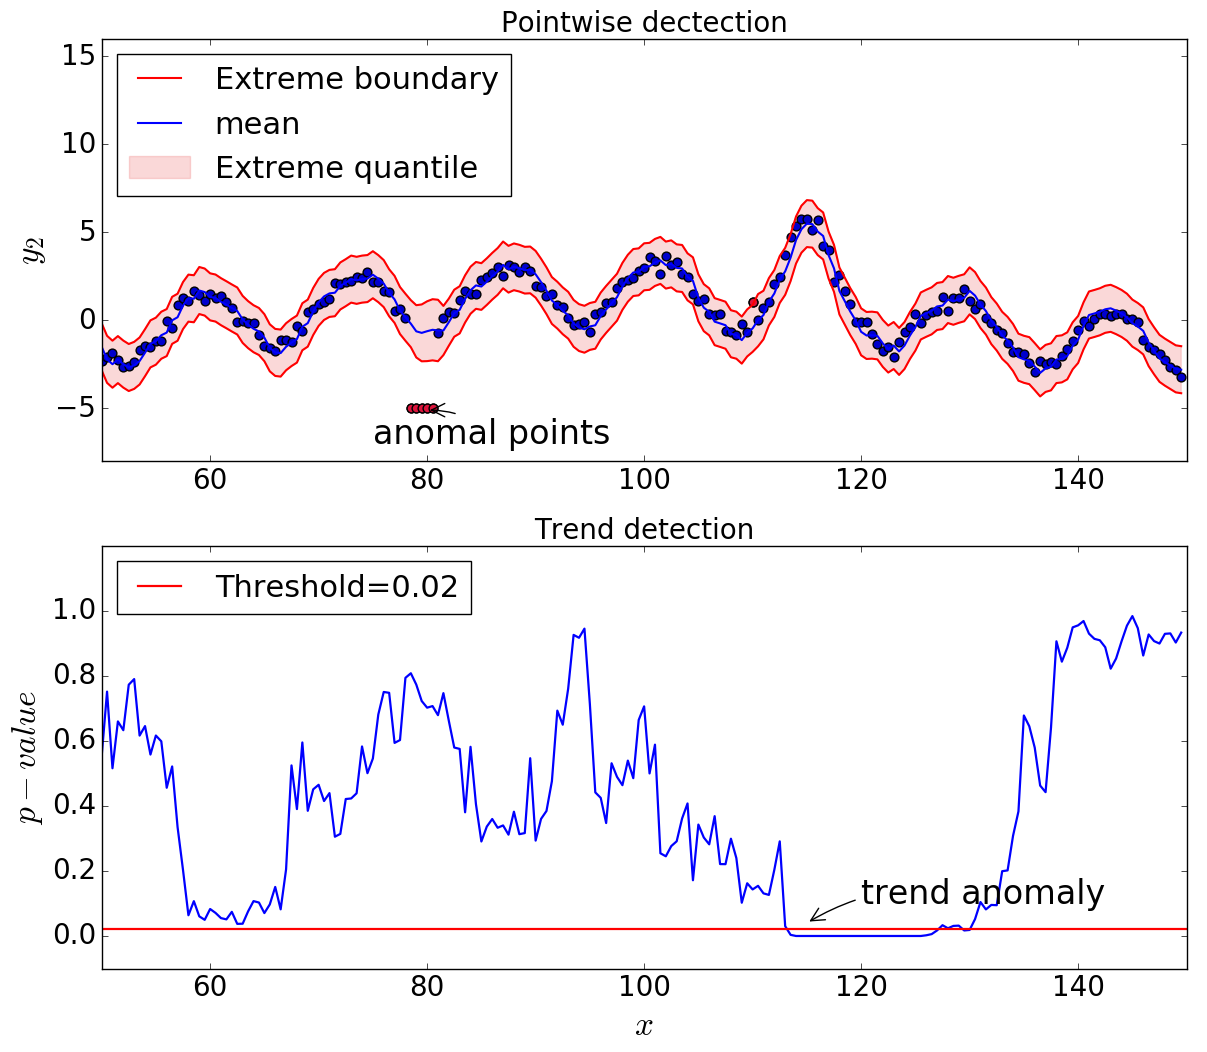

In [16]:
fig = pb.figure(figsize=(14,12))
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
    


#Output 1
ax1 = fig.add_subplot(211)
ax1.set_xlim([50,150])
ax1.set_ylim([-8,16])
ax1.set_ylabel(r'$y_{2}$',fontsize=24)
ax1.tick_params(labelsize=20)
ax1.set_title('Pointwise dectection',fontsize=20)
# ax1.plot(X,anomal_Y2,'kx',mew = 1.5,label="Data")
ax1.scatter(X,anomal_Y2,s = 40,color='mediumblue', zorder=2,edgecolors='black')
ax1.plot(np.array(test_points2)[:,0]/2,np.array(con_bd)[:,0],color='red',label="Extreme boundary",lw=1.5)
ax1.plot(np.array(test_points2)[:,1]/2,np.array(con_bd)[:,1],color='red',lw=1.5)
ax1.fill_between(f, c1, c2, color='lightcoral', alpha=0.3,label="Extreme quantile",zorder=1)
ax1.scatter(X[anomal_points],anomal_Y2[anomal_points],s = 40,color='crimson', zorder=2,edgecolors='black')
ax1.plot(np.array(test_points2)[:,1]/2,(c1+c2)/2,color='blue',label="mean",lw=1.5)
# ax1.legend(fontsize=22, loc='center left', bbox_to_anchor=(0.75, 0.75))
ax1.legend(fontsize=22, loc=2)
ax1.annotate('anomal points', xy=(80, -5.1), xytext=(75, -7), fontsize = 24, arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

#Output 2
ax2 = fig.add_subplot(212)
ax2.set_xlim([50,150])
ax2.set_ylim([-0.1,1.2])
ax2.set_xlabel(r'$x$',fontsize=24)
ax2.set_ylabel(r'$p-value$',fontsize=24)
ax2.tick_params(labelsize=20)
ax2.set_title('Trend detection',fontsize=20)
ax2.plot(X[100:300],chi_sq,lw=1.6)
a = np.linspace(0,150,1000)
th = 0.02*np.ones(a.shape)
ax2.plot(a,th,color='red',label="Threshold=0.02",lw=1.6)
# ax2.legend(fontsize=24, loc='center left', bbox_to_anchor=(0.75, 0.85))
ax2.legend(fontsize=22, loc=2)
ax2.annotate('trend anomaly', xy=(115, 0.04), xytext=(120, 0.1), fontsize = 24, arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
fig.savefig('6.png',bbox_inches='tight')
plt.show()

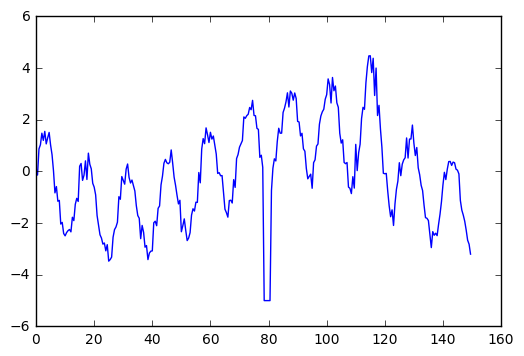

In [116]:
plt.plot(X,anomal_Y2)
plt.show()